## Goals: 
###  - Determine range of channels
###  - Determine channel at center of peak

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#plt.plot([1,2,3,4])
#plt.show()
csv = np.genfromtxt('k40_cal_2019-02-11_D3S.csv', delimiter= ",")


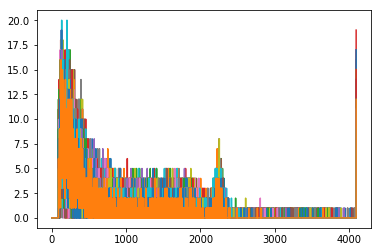

In [4]:
plt.plot(csv.T)
plt.show()

In [5]:
np.max(csv.T)

20.0

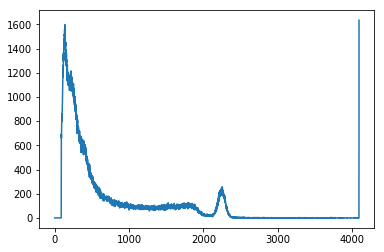

1634.0

In [6]:
summed = np.sum(csv.T, axis=1)
plt.plot(summed)
plt.show()
summed[-1]

<span style="color:red">
The last value appears to be noise.</span>.


<span style="color:red"> 
I am not sure what is up with the first peak but I know it is not the peak of interest, which is around index 2000 to 2500.</span>.

<span style="color:red"> 
Right now I am not sure how to determinine that the range of the peak of interest is the values 2000-2500 but I will hard code the values for now</span>.

#### Below are the channels with values over 7.5 in the range of 2000 to 2500.

In [7]:
#x = findPeak(summed, (2000, 2500))

[x for x in range(len(csv)) if np.max(csv[x][2000:2500]) > 7.5]

[125, 168]

60.618 72.1599894401
[ 215.55694956  246.41547935   45.51793072   11.42940124]


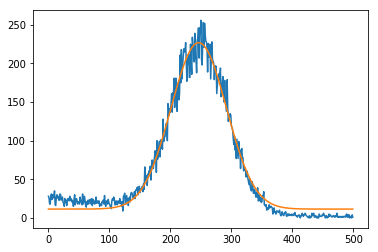

In [8]:
samp = summed[2000:2500]
mu = np.mean(samp)
sig = np.std(samp)
print(mu, sig)
#plt.plot(samp)

def func(x, a, m, s, c):
    return a * np.exp(-(x - m)**2 / (2 * s**2)) + c

xdata = range(0,len(samp))                                         
                                 
trydata = func(samp, np.max(samp), mu, sig, np.max(samp) + 50)

p0 = [250,250,50,10]
popt, pcov = curve_fit(func, xdata, samp, p0)

print(popt)
plt.plot(xdata,samp)
plt.plot(xdata,func(xdata, *popt))




plt.show()


## Find the channel# of the peak

The channel number is 246 and its values is 226.977371199


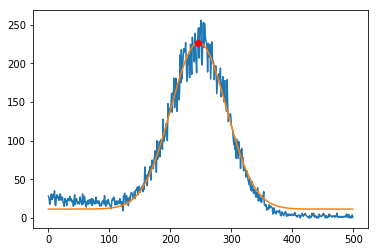

2246


In [13]:
fit = func(xdata, *popt)
channel = np.argmax(fit)
print("The channel number is", channel,"and its values is", np.max(fit))

plt.plot(xdata,samp)
plt.plot(xdata,func(xdata, *popt))
plt.plot(channel, np.max(fit), 'ro')
plt.show()
print(int(popt[1] + 2000))

# The End.
# Everything below here is no longer relevant____


Okay but all of that was cheating and I need to use the summed plot to find the width of the peak.

Then the plan is to take the highest value within that range and find the channel it corresponds to. 

I think i will start by disregarding the first peak and only looking at values above index 1000, and getting rid of the final value


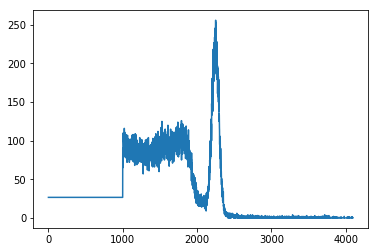

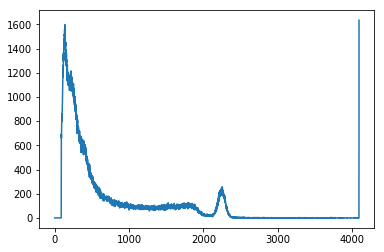

43.8265728704 267.726054085


In [10]:
snipped = summed.copy()
snipped[-1] = 0
snipped[:1000] = np.mean(summed)/5
plt.plot(snipped)
plt.show()

plt.plot(summed)
plt.show()


print(np.std(snipped), np.std(summed))


Okay so the plan for finding the peak will be to look for points above the standard deviation and to see if 9/10(arbitrary value) of the values in between are greater than the STD.

In [11]:
def peakFinder(data):
    std = np.std(data)
    points = []
    for x in range(len(data)):
        if data[x] == int(std):
            points = points + [x]
    for p in range(len(points) - 1):
        data[points[p]:
            
    return peak

peakFinder(snipped)

SyntaxError: invalid syntax (<ipython-input-11-3b698e30bc14>, line 10)

## Below is random code I wrote that turned out to be useless

In [ ]:
# This indexHelper helps me avoid array index out of bound errors
def indexHelper(i, top, up):
    if i <= 0 or i >= top - 1:
        return 0
    elif up:
        return i+1
    else:
        return i-1                                                                        
                                                                             

# Returns if x-1 < x > x+1
def isLiteralPeak(array, x, top):
    return array[indexHelper(x, top, False)] < array[x] and array[x] > array[indexHelper(x, top, True)]                                                                             
                                                                             
def findPeak(array, rng):
    top = len(array)
    peaks = []`
    [peaks.append((x, array[x])) for x in range(rng[0], rng[1]) if isLiteralPeak(array, x, top)]
    return peaks

In [ ]:
def rangeFinder(row):
    x, y = 0, 0
    for i in range(len(row)):
        if row[i] != 0:
            x = i
            break
    for j in reversed(range(len(row))):
        if row[j] != 0:
            y = j
            break
    return (x, y)
def channelRange(csv):
    return [(i, rangeFinder(csv[i])) for i in range(len(csv)) if rangeFinder(csv[i]) != (0, 0)]
channelRange(csv.T)